In [ ]:
#Import necessary libraries:
import tensorflow as tf
from tensorflow import keras
from keras import layers, datasets


In [8]:
#Load and preprocess your dataset
#Ex:CIFAR-10 dataset, which contains 60,000 32x32 color images in
# 10 different classes.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


In [10]:
#Create your CNN model. Here's a simple example with two convolutional layers,
# followed by two fully connected layers:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [11]:
#Compile the model and specify the loss function and optimizer:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [13]:
#Train the model using your dataset:

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4779 - accuracy: 0.4684 - val_loss: 1.2655 - val_accuracy: 0.5533
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1295 - accuracy: 0.6054 - val_loss: 1.0929 - val_accuracy: 0.6190
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0011 - accuracy: 0.6487 - val_loss: 1.0044 - val_accuracy: 0.6493
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9242 - accuracy: 0.6781 - val_loss: 0.9705 - val_accuracy: 0.6617
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8590 - accuracy: 0.7003 - val_loss: 0.9443 - val_accuracy: 0.6738
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8089 - accuracy: 0.7155 - val_loss: 0.9206 - val_accuracy: 0.6792
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7617 - accuracy: 0.7349 - val_loss: 0.9050 -

In [15]:
#Evaluate the model on your test data:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 3s - loss: 0.9528 - accuracy: 0.6802 - 3s/epoch - 10ms/step

Test accuracy: 0.6801999807357788


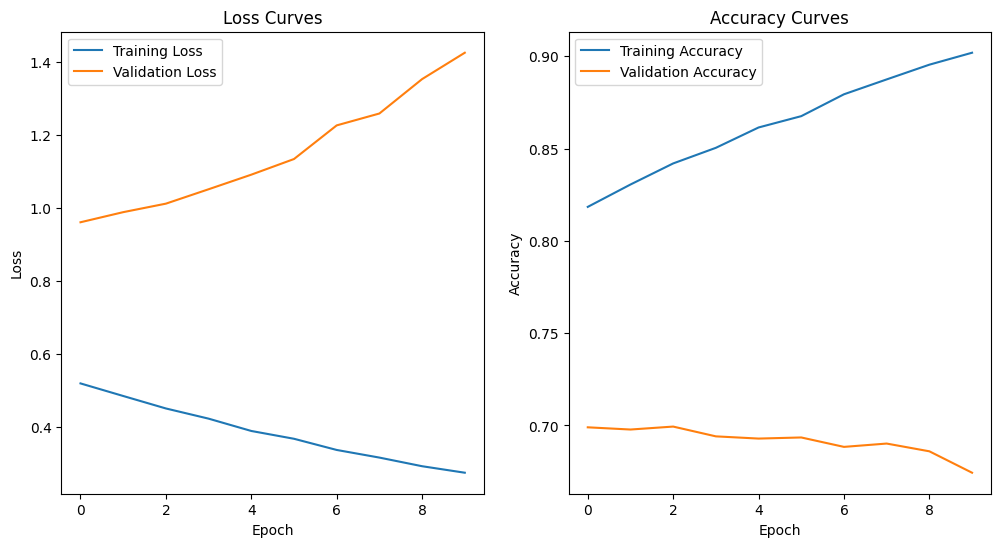

In [ ]:
# Plot accuracy vs. loss function curve
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()